# News Mood

## Analysis

#### Observed Trend 1: Twitter comments appear to have a slight negative polarization when viewed in a scatter plot

#### Observed Trend 2: Visualized from a bar graph, the compound VADER sentiment scores across each news agency are negative. BBC is leading the pack for most negativity.

#### Observed Trend 3: The NY times Tweets appear to maintain the most neutral Vader score.


In [1]:
# Dependencies
     #Cursor_VaderTweets_Bonus_Solved
import tweepy
import json
import numpy as np
import pandas as pd
import seaborn as sb
import time
import datetime
import matplotlib.pyplot as plt
from datetime import datetime,tzinfo,timedelta

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Twitter API Keys (please use your keys)
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:
# Target User Accounts
target_user = ("@BBCWorld", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")

# Variables for holding sentiments

compound_list = []
positive_list = []
negative_list = []
neutral_list = []

#Other variables for dataframe
user_list = []
converted_timestamps = []
tweet_time_ago = []
tweet_text = []

In [4]:
# Loop through each user
for user in target_user:
    counter = 0
       
    # Loop through 10 pages of tweets (total 100 tweets)
    for page in tweepy.Cursor(api.user_timeline, id=user).pages(100):

        # Get all tweets from home feed
        #public_tweets = api.user_timeline(user)
        page = page[0]
        tweet = json.dumps(page._json, indent=3)
        tweet = json.loads(tweet)
        text = tweet['text']
        raw_time = tweet['created_at']
        
        converted_time = datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")
        date_stamp = converted_time.strftime("%m-%d-%Y")
        converted_time = converted_time.strftime("%m-%d-%Y %H:%M:%S") 
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(text)["compound"]
        pos = analyzer.polarity_scores(text)["pos"]
        neu = analyzer.polarity_scores(text)["neu"]
        neg = analyzer.polarity_scores(text)["neg"]

        # Add each value to the appropriate array
        user_list.append(user)
        compound_list.append(compound)
        positive_list.append(pos)
        neutral_list.append(neu)
        negative_list.append(neg)
        
        converted_timestamps.append(converted_time)
        tweet_time_ago.append(counter)
        tweet_text.append(text)
              
        counter = counter + 1
        
        if counter % 59 == 0:
            time.sleep(60)

In [5]:
twitter_data = {"User" : user_list,
                "Compound" : compound_list,
                "Positive" : positive_list,
                "Neutral" : neutral_list,
                "Negative" : negative_list,
                "Tweet" : tweet_text,
                "Time Stamp" : converted_timestamps,
                "Tweet_Ago" : tweet_time_ago,
               }

twitter_data = pd.DataFrame(twitter_data)

twitter_data.head()

,Compound,Negative,Neutral,Positive,Time Stamp,Tweet,Tweet_Ago,User
0,-0.5994,0.494,0.506,0.000,09-21-2017 14:52:03,'We are at war' https://t.co/Uz5k2mKR8l,0,@BBCWorld
1,0.2023,0.000,0.833,0.167,09-21-2017 09:22:25,Florian Philippot: Le Pen's top aide quits Nat...,1,@BBCWorld
2,0.0000,0.000,1.000,0.000,09-21-2017 04:41:39,Moving on up https://t.co/1s6JB2gAtV,2,@BBCWorld
3,0.0000,0.000,1.000,0.000,09-20-2017 17:21:49,Iranian President Rouhani hits back at Donald ...,3,@BBCWorld
4,0.3182,0.193,0.504,0.303,09-20-2017 12:31:50,Kenya's Supreme Court criticises IEBC electora...,4,@BBCWorld


# Sentiment Analysis of Media Tweets

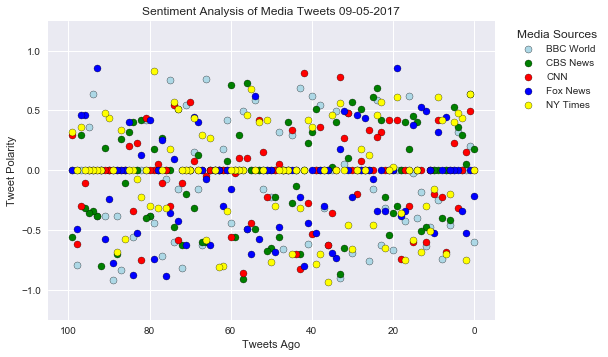

In [6]:
BBCWorld = twitter_data[(twitter_data.User == "@BBCWorld")]
CBSNews = twitter_data[(twitter_data.User == "@CBSNews")]
CNN = twitter_data[(twitter_data.User == "@CNN")]
FoxNews = twitter_data[(twitter_data.User == "@FoxNews")]
NYTimes = twitter_data[(twitter_data.User == "@nytimes")]


plt.scatter(BBCWorld["Tweet_Ago"], BBCWorld["Compound"], label = "BBC World", marker="o", c=["lightblue"], edgecolors="black")
plt.scatter(CBSNews["Tweet_Ago"], CBSNews["Compound"], label = "CBS News", marker="o", c=["green"], edgecolors="black")
plt.scatter(CNN["Tweet_Ago"], CNN["Compound"], label = "CNN", marker="o", c=["red"], edgecolors="black")
plt.scatter(FoxNews["Tweet_Ago"], FoxNews["Compound"], label = "Fox News", marker="o", c=["blue"], edgecolors="black")
plt.scatter(NYTimes["Tweet_Ago"], NYTimes["Compound"], label = "NY Times", marker="o", c=["yellow"], edgecolors="black")

# Plot field size
plt.xlim(-5, counter + 5)
plt.ylim(-1.25, 1.25)

# Incorporate the other graph properties
plt.title("Sentiment Analysis of Media Tweets" + " " + str(date_stamp))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(True)

plt.legend(title="Media Sources", bbox_to_anchor=(1.25, 1))

# Save the figure
plt.savefig("Sentiment Analysis of Media Tweets.png")

# invert x axis
ax = plt.gca()
ax.invert_xaxis()

# Show plot
plt.show()

# Overall Media Sentiment Based on Twitter

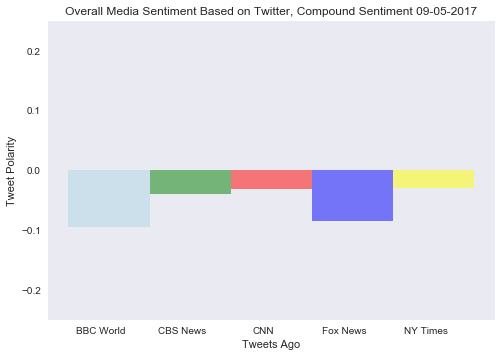

In [7]:
BBCWorld = twitter_data[(twitter_data.User == "@BBCWorld")]
CBSNews = twitter_data[(twitter_data.User == "@CBSNews")]
CNN = twitter_data[(twitter_data.User == "@CNN")]
FoxNews = twitter_data[(twitter_data.User == "@FoxNews")]
NYTimes = twitter_data[(twitter_data.User == "@nytimes")]

BBCWorld_average_compound = BBCWorld.mean()["Compound"]
CBSNews_average_compound = CBSNews.mean()["Compound"]
CNN_average_compound = CNN.mean()["Compound"]
FoxNews_average_compound = FoxNews.mean()["Compound"]
NYTimes_average_compound = NYTimes.mean()["Compound"]

# Create an array that contains the number of users each language has
users = [BBCWorld_average_compound, CBSNews_average_compound, CNN_average_compound, FoxNews_average_compound, NYTimes_average_compound]
x_axis = np.arange(len(users))

# Tell matplotlib that we will be making a bar chart
plt.bar(x_axis, users, width=1, color=["lightblue", "green", "red", "blue", "yellow"], alpha=0.5, align="edge")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC World", "CBS News", "CNN", "Fox News", "NY Times"])

# Plot field size
plt.ylim(-.25, .25)

# Incorporate the other graph properties
plt.title("Overall Media Sentiment Based on Twitter, Compound Sentiment" + " " + str(date_stamp))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(False)

# # Save the figure
plt.savefig("Overall Media Sentiment Based on Twitter, Compound Sentiment.png")

# Show plot
plt.show()

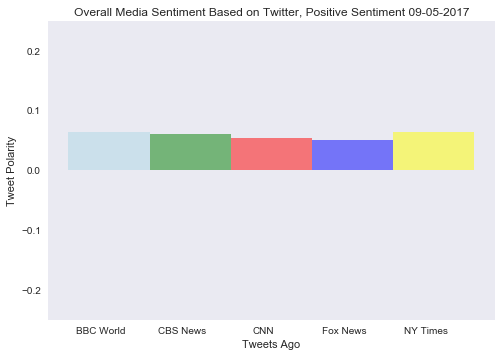

In [8]:
BBCWorld = twitter_data[(twitter_data.User == "@BBCWorld")]
CBSNews = twitter_data[(twitter_data.User == "@CBSNews")]
CNN = twitter_data[(twitter_data.User == "@CNN")]
FoxNews = twitter_data[(twitter_data.User == "@FoxNews")]
NYTimes = twitter_data[(twitter_data.User == "@nytimes")]

BBCWorld_average_positive = BBCWorld.mean()["Positive"]
CBSNews_average_positive = CBSNews.mean()["Positive"]
CNN_average_positive = CNN.mean()["Positive"]
FoxNews_average_positive = FoxNews.mean()["Positive"]
NYTimes_average_positive = NYTimes.mean()["Positive"]

# Create an array that contains the number of users each language has
users = [BBCWorld_average_positive, CBSNews_average_positive, CNN_average_positive, FoxNews_average_positive, NYTimes_average_positive]
x_axis = np.arange(len(users))

# Tell matplotlib that we will be making a bar chart
plt.bar(x_axis, users, width=1, color=["lightblue", "green", "red", "blue", "yellow"], alpha=0.5, align="edge")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC World", "CBS News", "CNN", "Fox News", "NY Times"])

# Plot field size
plt.ylim(-.25, .25)

# Incorporate the other graph properties
plt.title("Overall Media Sentiment Based on Twitter, Positive Sentiment" + " " + str(date_stamp))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(False)

# # Save the figure
plt.savefig("Overall Media Sentiment Based on Twitter, Positive Sentiment.png")

# Show plot
plt.show()

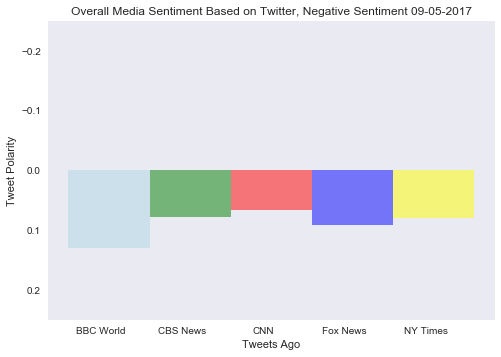

In [9]:
BBCWorld = twitter_data[(twitter_data.User == "@BBCWorld")]
CBSNews = twitter_data[(twitter_data.User == "@CBSNews")]
CNN = twitter_data[(twitter_data.User == "@CNN")]
FoxNews = twitter_data[(twitter_data.User == "@FoxNews")]
NYTimes = twitter_data[(twitter_data.User == "@nytimes")]

BBCWorld_average_negative = BBCWorld.mean()["Negative"]
CBSNews_average_negative = CBSNews.mean()["Negative"]
CNN_average_negative = CNN.mean()["Negative"]
FoxNews_average_negative = FoxNews.mean()["Negative"]
NYTimes_average_negative = NYTimes.mean()["Negative"]

# Create an array that contains the number of users each language has
users = [BBCWorld_average_negative, CBSNews_average_negative, CNN_average_negative, FoxNews_average_negative, NYTimes_average_negative]
x_axis = np.arange(len(users))

# Tell matplotlib that we will be making a bar chart
plt.bar(x_axis, users, width=1, color=["lightblue", "green", "red", "blue", "yellow"], alpha=0.5, align="edge")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC World", "CBS News", "CNN", "Fox News", "NY Times"])

# Plot field size
plt.ylim(-.25, .25)

# Incorporate the other graph properties
plt.title("Overall Media Sentiment Based on Twitter, Negative Sentiment" + " " + str(date_stamp))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(False)

# invert y axis, positive score reflects a negative responce
ax = plt.gca()
ax.invert_yaxis()

# # Save the figure
plt.savefig("Overall Media Sentiment Based on Twitter, Negative Sentiment.png")

# Show plot
plt.show()

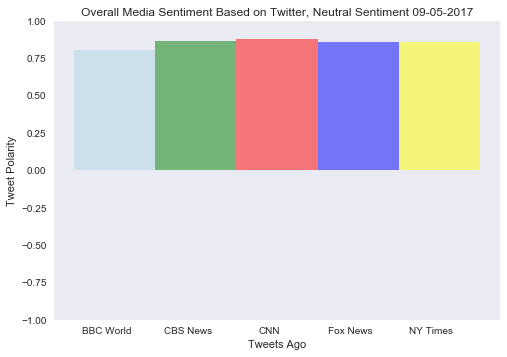

In [10]:
BBCWorld = twitter_data[(twitter_data.User == "@BBCWorld")]
CBSNews = twitter_data[(twitter_data.User == "@CBSNews")]
CNN = twitter_data[(twitter_data.User == "@CNN")]
FoxNews = twitter_data[(twitter_data.User == "@FoxNews")]
NYTimes = twitter_data[(twitter_data.User == "@nytimes")]

BBCWorld_average_neutral = BBCWorld.mean()["Neutral"]
CBSNews_average_neutral = CBSNews.mean()["Neutral"]
CNN_average_neutral = CNN.mean()["Neutral"]
FoxNews_average_neutral = FoxNews.mean()["Neutral"]
NYTimes_average_neutral = NYTimes.mean()["Neutral"]

# Create an array that contains the number of users each language has
users = [BBCWorld_average_neutral, CBSNews_average_neutral, CNN_average_neutral, FoxNews_average_neutral, NYTimes_average_neutral]
x_axis = np.arange(len(users))

# Tell matplotlib that we will be making a bar chart
plt.bar(x_axis, users, width=1, color=["lightblue", "green", "red", "blue", "yellow"], alpha=0.5, align="edge")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC World", "CBS News", "CNN", "Fox News", "NY Times"])

# Plot field size
plt.ylim(-1, 1)

# Incorporate the other graph properties
plt.title("Overall Media Sentiment Based on Twitter, Neutral Sentiment" + " " + str(date_stamp))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(False)

# # Save the figure
plt.savefig("Overall Media Sentiment Based on Twitter, Neutral Sentiment.png")

# Show plot
plt.show()

In [11]:
twitter_data.to_csv("Twitter_age.csv")